# Kindi Krishna Nikhil-BL.EN.U4AIUE21068
# LAB-5

# A1.Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.Use numpy.fft.ifft()to inverse transform the frequency spectrumto time domain signal.

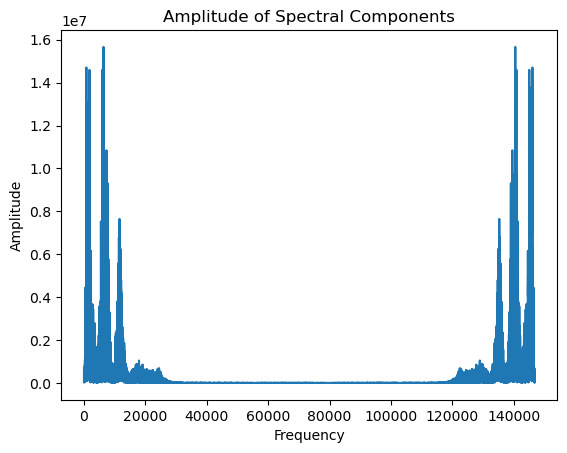

Mean Squared Error between original and reconstructed signals: (5.928197233948492e-25+1.8579895658182595e-26j)


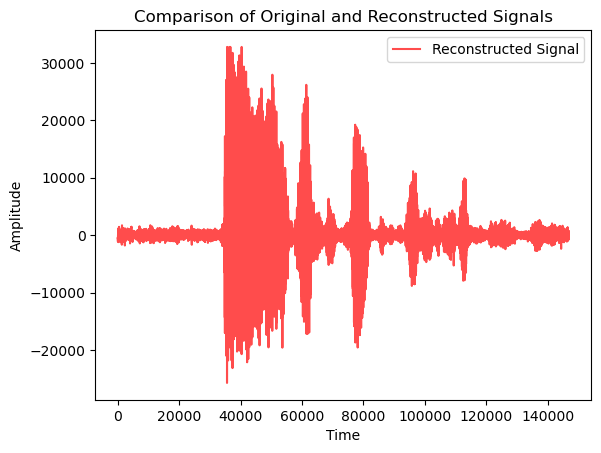

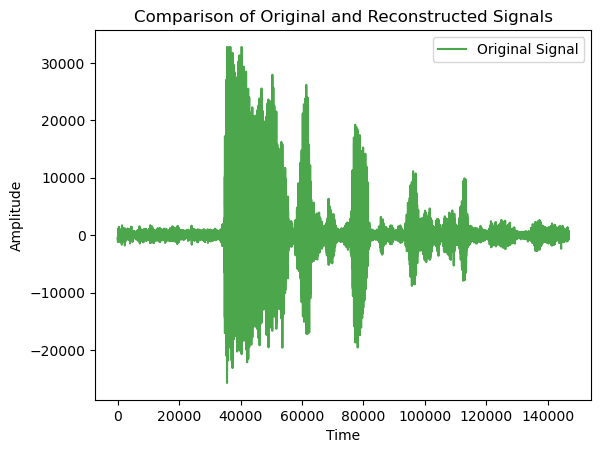

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

# Load the speech signal from the WAV file
fs, speech_signal = wavfile.read("nikhil.wav")

# A1. Transform the speech signal to its spectral domain using numpy.fft.fft()
spectral_components = np.fft.fft(speech_signal)

# Plot the amplitude part of the spectral components
plt.plot(np.abs(spectral_components))
plt.title('Amplitude of Spectral Components')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


sample_rate, original_signal = wavfile.read('nikhil.wav')
frequency_spectrum = np.fft.fft(original_signal)
time_domain_signal = np.fft.ifft(frequency_spectrum)
mse = np.mean((original_signal - time_domain_signal) ** 2)
print("Mean Squared Error between original and reconstructed signals:", mse)

reconstructed_signal = np.fft.ifft(spectral_components)

# Compare the generated time domain signal with the original signal

plt.plot(reconstructed_signal, label='Reconstructed Signal', alpha=0.7, color = "red")
plt.title('Comparison of Original and Reconstructed Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


plt.plot(speech_signal, label='Original Signal', alpha=0.7, color = "green")
plt.title('Comparison of Original and Reconstructed Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



# A2. Use a rectangular window to select the low frequency components from your spectrum.Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.

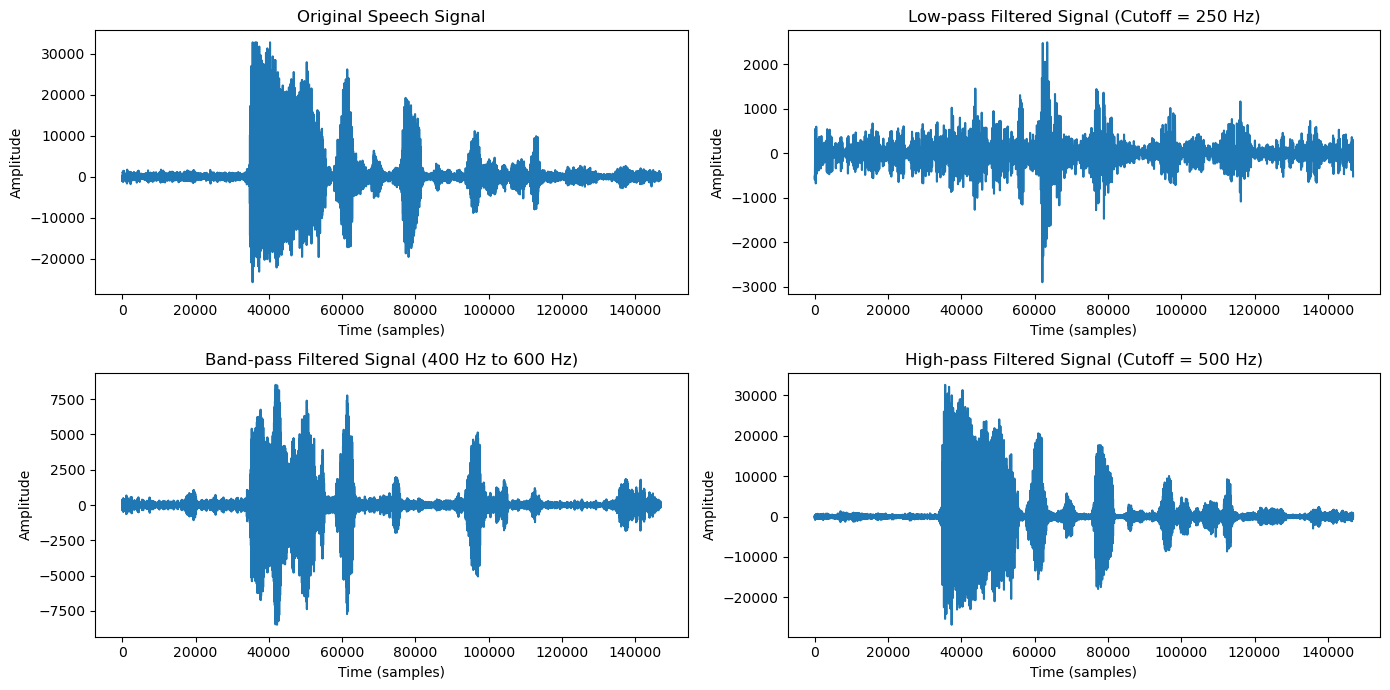

Low-pass filtered audio:


Band-pass filtered audio:


High-pass filtered audio:


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve

fs, speech_signal = wavfile.read("nikhil.wav")

# Perform Fourier Transform
speech_spectrum = np.fft.fft(speech_signal)

# Rectangular window functions for different filters
def low_pass_filter(spectrum, cutoff_freq, fs):
    freqs = np.fft.fftfreq(len(spectrum), 1/fs)
    window = np.where(np.abs(freqs) <= cutoff_freq, 1, 0)
    return spectrum * window

def band_pass_filter(spectrum, low_cutoff, high_cutoff, fs):
    freqs = np.fft.fftfreq(len(spectrum), 1/fs)
    window = np.where((np.abs(freqs) >= low_cutoff) & (np.abs(freqs) <= high_cutoff), 1, 0)
    return spectrum * window

def high_pass_filter(spectrum, cutoff_freq, fs):
    freqs = np.fft.fftfreq(len(spectrum), 1/fs)
    window = np.where(np.abs(freqs) >= cutoff_freq, 1, 0)
    return spectrum * window

# Apply filters
cutoff_low = 250  # Low-pass cutoff frequency
cutoff_high = 500  # High-pass cutoff frequency
cutoff_band_low = 400  # Band-pass low cutoff frequency
cutoff_band_high = 600  # Band-pass high cutoff frequency

# Low-pass filter
filtered_spectrum_low = low_pass_filter(speech_spectrum, cutoff_low, fs)
filtered_signal_low = np.fft.ifft(filtered_spectrum_low).real

# Band-pass filter
filtered_spectrum_band = band_pass_filter(speech_spectrum, cutoff_band_low, cutoff_band_high, fs)
filtered_signal_band = np.fft.ifft(filtered_spectrum_band).real

# High-pass filter
filtered_spectrum_high = high_pass_filter(speech_spectrum, cutoff_high, fs)
filtered_signal_high = np.fft.ifft(filtered_spectrum_high).real

# Plot the filtered signals
plt.figure(figsize=(14, 7))

# Original Signal
plt.subplot(2, 2, 1)
plt.plot(speech_signal)
plt.title('Original Speech Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

# Low-pass filtered signal
plt.subplot(2, 2, 2)
plt.plot(filtered_signal_low)
plt.title('Low-pass Filtered Signal (Cutoff = {} Hz)'.format(cutoff_low))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

# Band-pass filtered signal
plt.subplot(2, 2, 3)
plt.plot(filtered_signal_band)
plt.title('Band-pass Filtered Signal ({} Hz to {} Hz)'.format(cutoff_band_low, cutoff_band_high))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

# High-pass filtered signal
plt.subplot(2, 2, 4)
plt.plot(filtered_signal_high)
plt.title('High-pass Filtered Signal (Cutoff = {} Hz)'.format(cutoff_high))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Save the filtered signals as audio files
wavfile.write('low_pass_filtered_signal.wav', fs, np.int16(filtered_signal_low))
wavfile.write('band_pass_filtered_signal.wav', fs, np.int16(filtered_signal_band))
wavfile.write('high_pass_filtered_signal.wav', fs, np.int16(filtered_signal_high))

# Print the audios for each filter
print("Low-pass filtered audio:")
display(Audio('low_pass_filtered_signal.wav'))

print("Band-pass filtered audio:")
display(Audio('band_pass_filtered_signal.wav'))

print("High-pass filtered audio:")
display(Audio('high_pass_filtered_signal.wav'))


# A3  Repeat A2 with other filter types such as Cosine / Gausian filters.

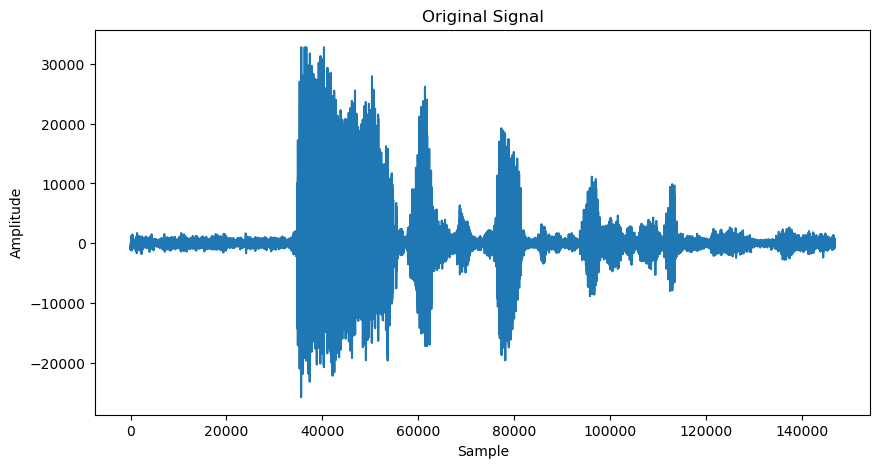

In [20]:
import numpy as np
import scipy.io.wavfile as wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt

# Load the speech signal
sample_rate, signal = wavfile.read("nikhil.wav")

# Define cosine and gaussian windows
cosine_window = np.cos(np.linspace(0, np.pi, len(signal)))
gaussian_window = np.exp(-(np.linspace(-1, 1, len(signal))) ** 2)

# Plot the original signal
plt.figure(figsize=(10, 5))
plt.plot(signal)
plt.title('Original Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


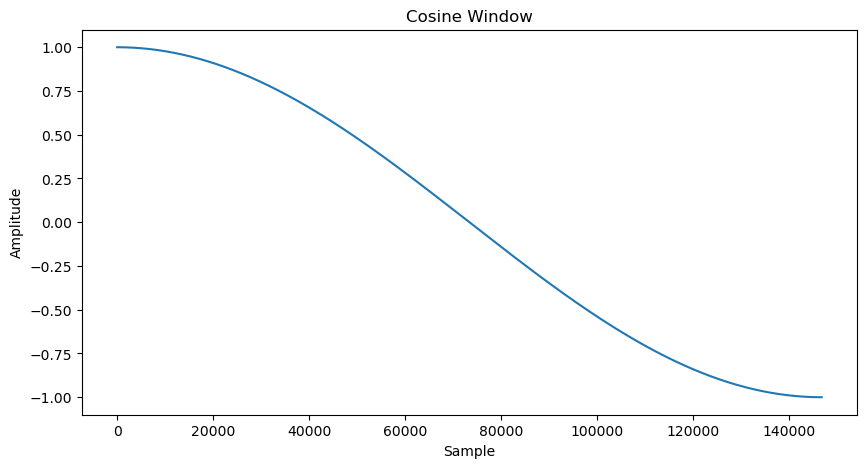

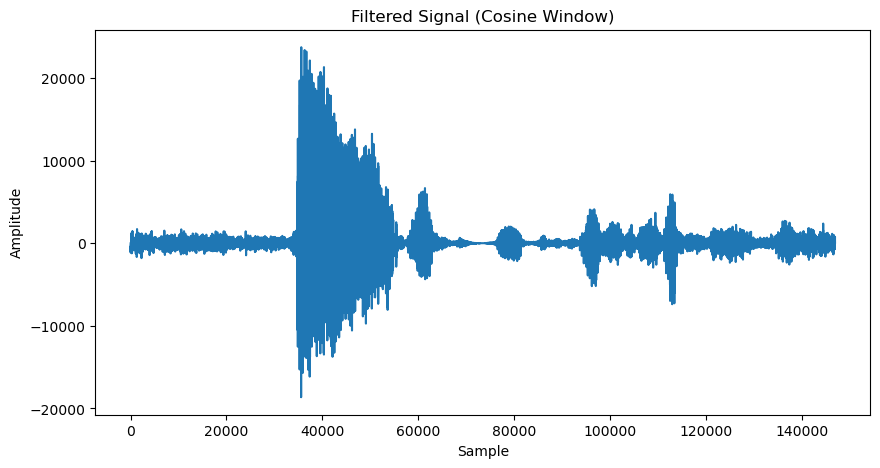

Cosine filtered Sound:


In [29]:

# Plot the cosine window
plt.figure(figsize=(10, 5))
plt.plot(cosine_window)
plt.title('Cosine Window')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


# Filter the spectrum using cosine window
filtered_fft_result_cosine = np.fft.fft(signal * cosine_window)


# Inverse transform the filtered spectra
filtered_signal_cosine = np.fft.ifft(filtered_fft_result_cosine)


# Plot the filtered signals
plt.figure(figsize=(10, 5))
plt.plot(np.real(filtered_signal_cosine))
plt.title('Filtered Signal (Cosine Window)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Save the filtered signals as audio files
wavfile.write('filtered_sound_cosine.wav', sample_rate, np.real(filtered_signal_cosine).astype(np.int16))
wavfile.write('filtered_sound_gaussian.wav', sample_rate, np.real(filtered_signal_gaussian).astype(np.int16))

# Display audio files for playback
print('Cosine filtered Sound:')
display(Audio(filename='filtered_sound_cosine.wav'))


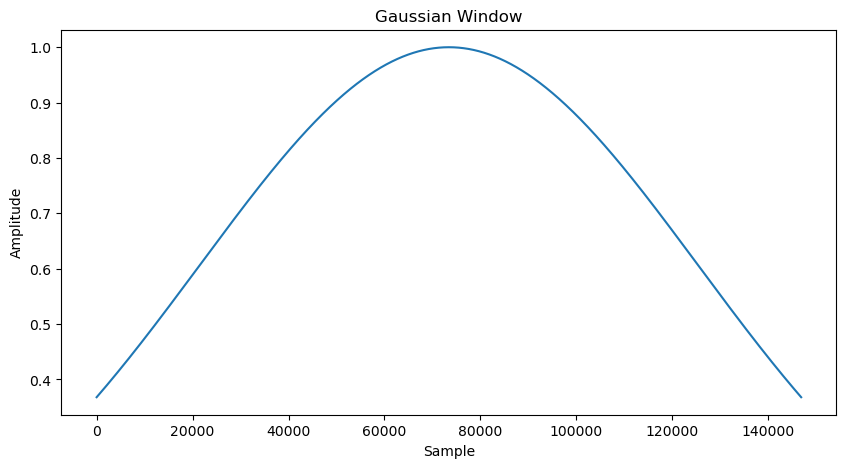

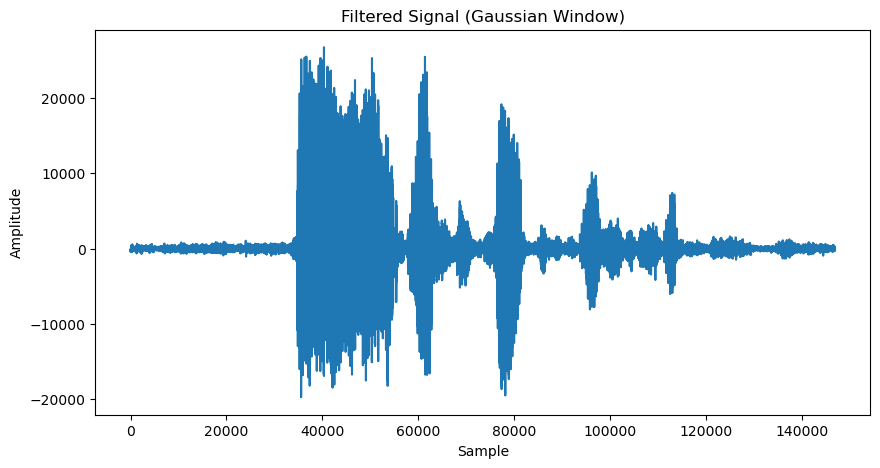


 Gaussian filtered Sound:


In [23]:
# Plot the gaussian window
plt.figure(figsize=(10, 5))
plt.plot(gaussian_window)
plt.title('Gaussian Window')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Filter the spectrum using gaussian window
filtered_fft_result_gaussian = np.fft.fft(signal * gaussian_window)

# Inverse transform the filtered spectra
filtered_signal_gaussian = np.fft.ifft(filtered_fft_result_gaussian)


# Plot the filtered signals
plt.figure(figsize=(10, 5))
plt.plot(np.real(filtered_signal_gaussian))
plt.title('Filtered Signal (Gaussian Window)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Save the filtered signals as audio files
wavfile.write('filtered_sound_gaussian.wav', sample_rate, np.real(filtered_signal_gaussian).astype(np.int16))

# Display audio files for playback
print('\n Gaussian filtered Sound:')
display(Audio(filename='filtered_sound_gaussian.wav'))
